## Step 1: Basic EDA For Loan Data

#### Overall Idea : 

#### 1. load data via Pandas 
#### 2. clean the data set first --> remove unwanted fields, etc. 
#### 3. perform univariate and bivariate analysis
#### 4. produce derive metrics.

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [55]:
# import raw data. 
# perform some upfront analysis. 

loan_raw_data = pd.read_csv("loan.csv", low_memory=False)

In [56]:
# check data. 

loan_raw_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [57]:
# check shape of the data frame

loan_raw_data.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [58]:
# check total number of rows in the dataset before checking the count of NULL or missing values. 

print()
print("Number of Rows in the dataset: ", loan_raw_data.shape[0])
print()
print("Number of Columns in the dataset: ", loan_raw_data.shape[1])
print()


Number of Rows in the dataset:  39717

Number of Columns in the dataset:  111



In [59]:
# check null values upfront. 

loan_raw_data.isna().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


#### It is clear from above that the data has a lot of columns which has all values as NULL. Hence, there is no point of using them for further analysis. 

In [60]:
# prepare new dataframe without the columns which have all values as NULL

loan_select_cols = loan_raw_data.dropna(axis=1, how="all")

In [61]:
# check new dataframe

loan_select_cols.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [62]:
# check total number of rows in the new dataset before cross-checking the count of NULL or missing values. 

print()
print("Number of Rows in the dataset: ", loan_select_cols.shape[0])
print()
print("Number of Columns in the dataset: ", loan_select_cols.shape[1])
print()


Number of Rows in the dataset:  39717

Number of Columns in the dataset:  57



In [63]:
# again, check null values upfront. 

loan_select_cols.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

#### As seen above, there are still columns where there are NULL values. Where there are more than 90% or at least 1/3rd of NULL Values we'd get rid of these columns, else we'll impute values if possible. 

In [64]:
# drop column next_pymnt_d

loan_select_cols = loan_select_cols.drop('next_pymnt_d', axis=1)

# drop column mths_since_last_delinq

loan_select_cols = loan_select_cols.drop('mths_since_last_delinq', axis=1)

# drop column mths_since_last_record

loan_select_cols = loan_select_cols.drop('mths_since_last_record', axis=1)

# again, check null values upfront. 

loan_select_cols.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

#### Out of the above, there is no need of some of the columns which we can safely delete, like Description and Employment Title. For some like Employment Length, we need to impute values. In this case I will impute = 0. For the rest of the columns we can safely delete the rows as the number of occurrences of NULL values is very less. 

In [65]:
# drop description and emp_title columns. 

loan_select_cols.drop(labels=['desc','emp_title'], axis=1, inplace=True)

# again, check null values upfront. 

loan_select_cols.isna().sum()


id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal           

In [66]:
# removing rows where below columns are NULL
# title                            
# revol_util
# last_pymnt_d
# last_credit_pull_d
# collections_12_mths_ex_med
# chargeoff_within_12_mths
# pub_rec_bankruptcies
# tax_liens

loan_select_cols.dropna(subset = ['title', 'revol_util', 'last_pymnt_d',
                                 'last_credit_pull_d','collections_12_mths_ex_med',
                                 'chargeoff_within_12_mths','pub_rec_bankruptcies','tax_liens'], inplace=True)

# again, check null values upfront. 

loan_select_cols.isna().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_length                    1066
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                            0
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal           

In [67]:
# Finally we impute values in the column : emp_length                    

# let's see what's the count of each value

loan_select_cols.groupby('emp_length')['id'].nunique()

# as the data is not in a proper shape, we have to clean it first. 
# replace year and years text with blank. 

loan_select_cols.emp_length = loan_select_cols.emp_length.str.replace(' years','')

loan_select_cols.emp_length = loan_select_cols.emp_length.str.replace(' year','')

loan_select_cols.emp_length = loan_select_cols.emp_length.str.replace('+','')

loan_select_cols.emp_length = loan_select_cols.emp_length.str.replace('< 1','0')

loan_select_cols.emp_length = pd.to_numeric(loan_select_cols.emp_length, errors='coerce').fillna(0).astype(np.int64)

# let's see what's the count of each value

loan_select_cols.groupby('emp_length')['id'].nunique()

# finally recheck the null entries. 

loan_select_cols.isna().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_

#### Before we proceed with further analysis, let's get rid of customers for whom the loan is current, as for this analysis we'd need to perform analysis only on loans which are either paid off fully or are charged off. 

In [68]:
# selecting only the required records. 

loan_select_cols = loan_select_cols[loan_select_cols.loan_status != 'Current']

# check total number of rows in the dataset after above operation. 

print()
print("Number of Rows in the dataset: ", loan_select_cols.shape[0])
print()
print("Number of Columns in the dataset: ", loan_select_cols.shape[1])
print()


Number of Rows in the dataset:  37749

Number of Columns in the dataset:  52



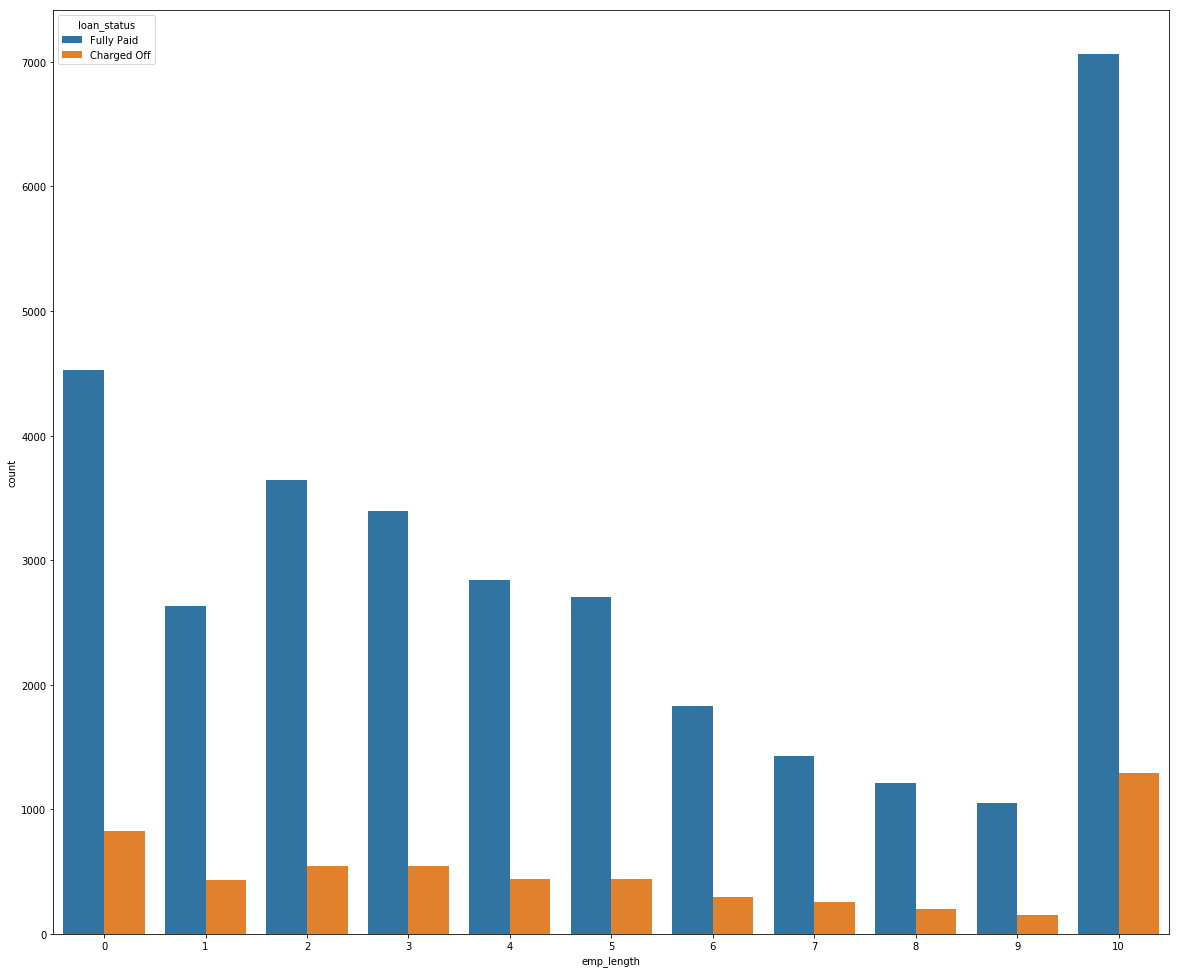

In [69]:
fig = plt.figure(figsize=(20, 17))
sns.countplot(x=loan_select_cols.emp_length, 
              hue='loan_status', 
              data=loan_select_cols, 
              order=sorted(loan_select_cols.emp_length.unique()) )

#### as seen above, we cannot really find any correlation. let's see if we can plot a correlation map of all fields in the data frame and find any relations. 

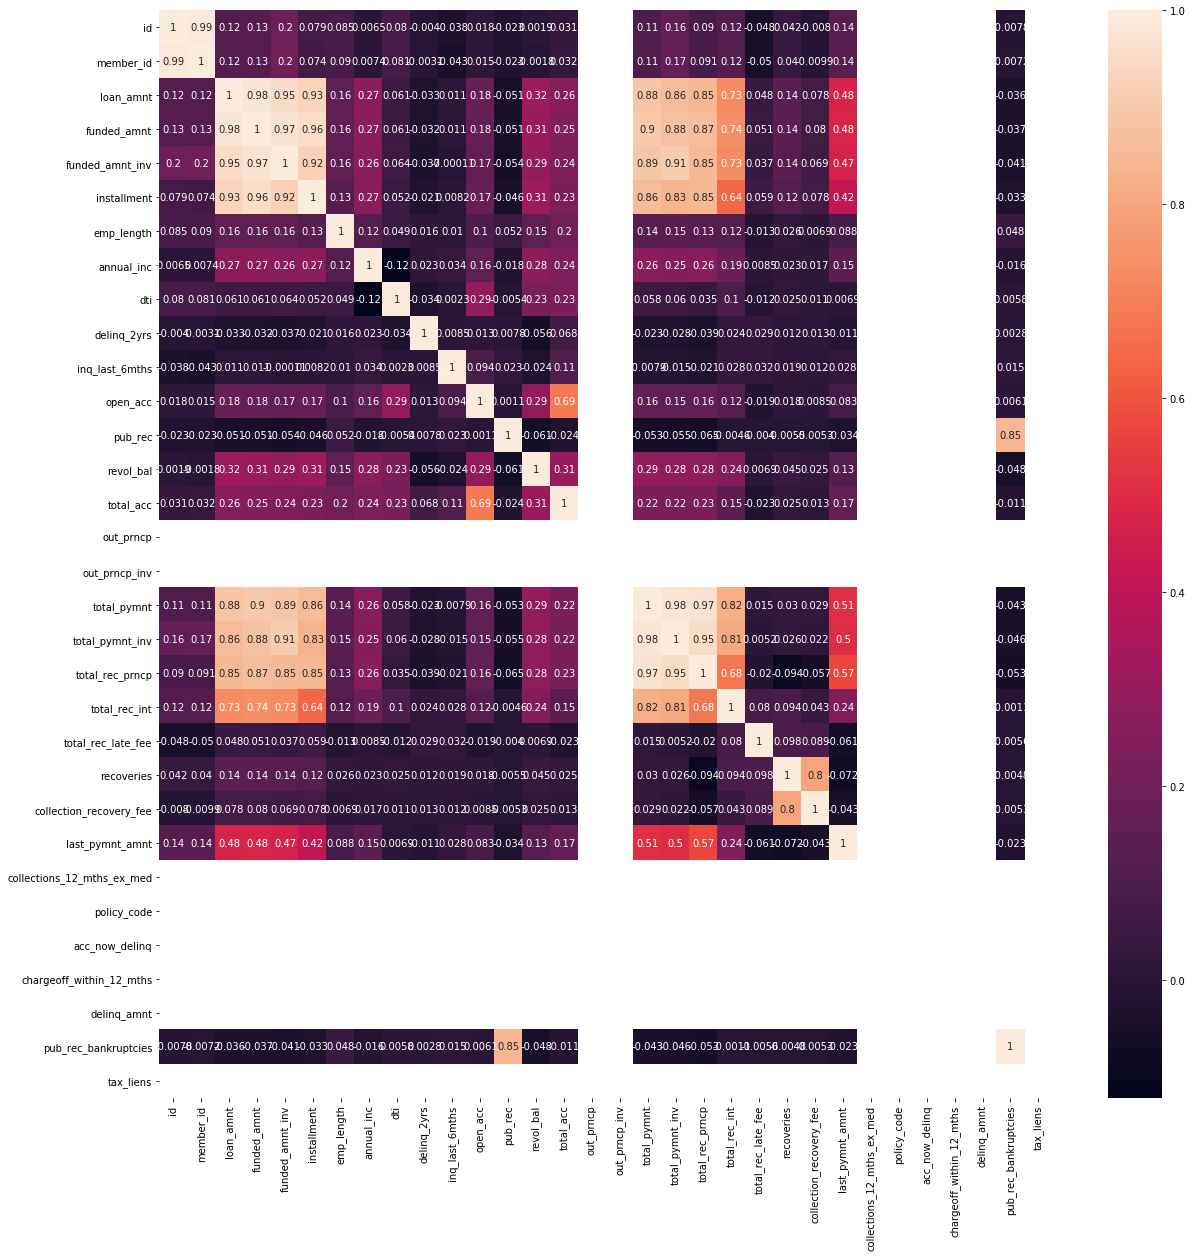

In [70]:
'''
Trying a correlation matrix with all columns. 
'''

fig, ax = plt.subplots(figsize=(20,20))
corr = loan_select_cols.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            ax = ax,
            annot=True
           )

#### There are still some columns which do not show any correlation at all, which needs to be removed. 

In [71]:
'''
Firstly let's remove some more unwanted columns. 
'''

print(loan_select_cols.columns)

cols_to_drop = ['id', 'member_id', 'url', 'purpose', 
                'zip_code', 'collections_12_mths_ex_med', 'policy_code',
                'acc_now_delinq', 'chargeoff_within_12_mths',
                'delinq_amnt', 'tax_liens'
               ]

loan_select_cols.drop(labels=cols_to_drop,axis=1,inplace=True)

print(loan_select_cols.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')
Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate'

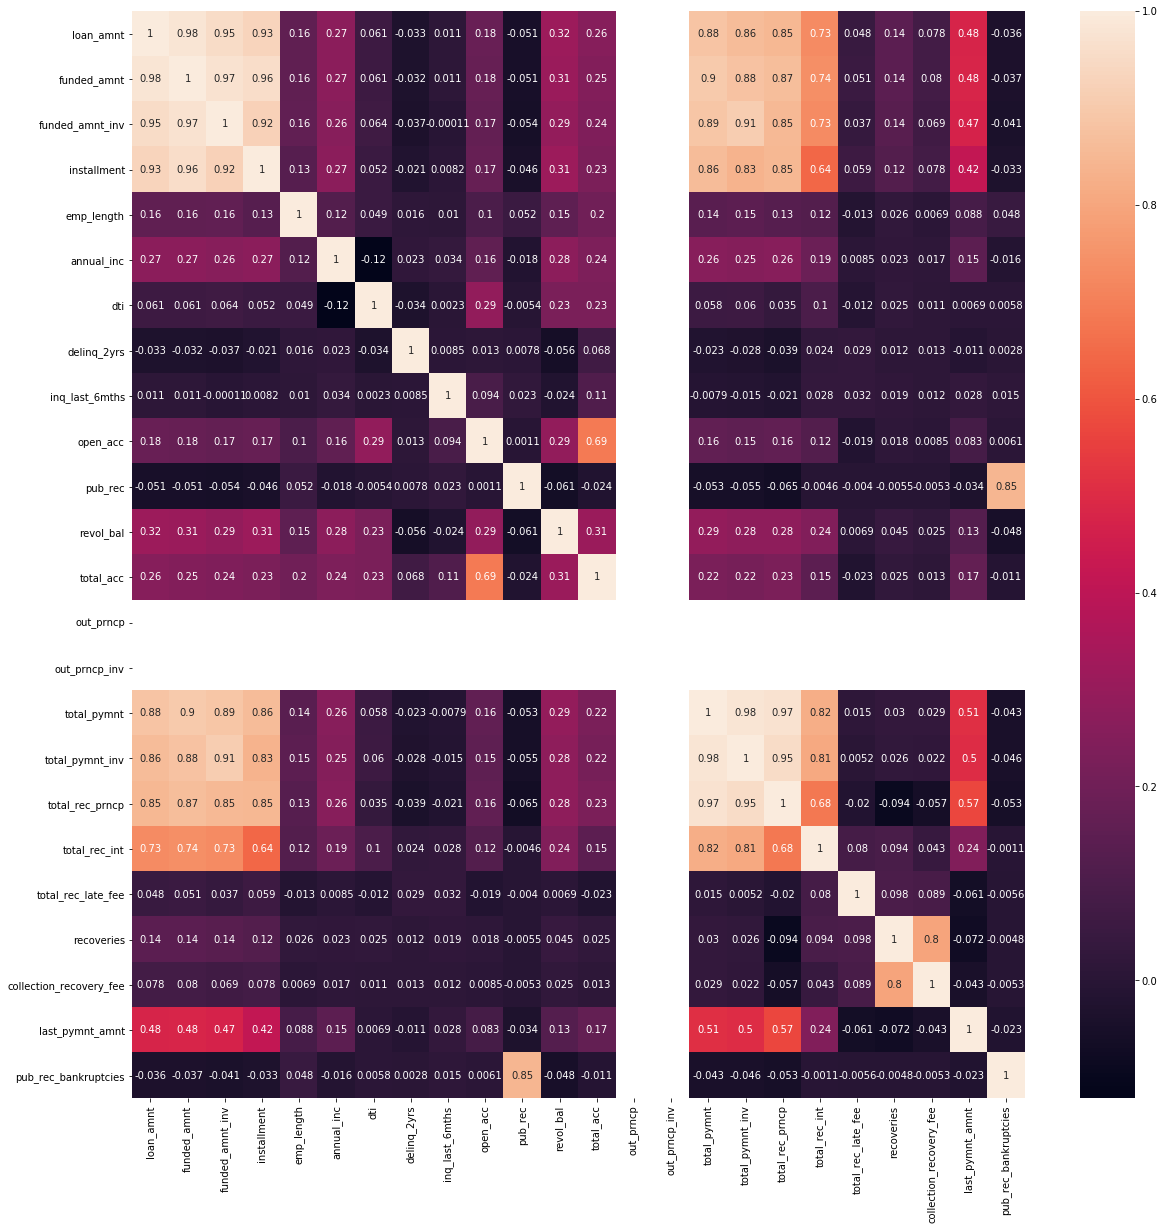

In [72]:
'''
Trying a correlation matrix with all columns. 
'''

fig, ax = plt.subplots(figsize=(20,20))
corr = loan_select_cols.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            ax = ax,
            annot=True
           )

#### We still cannot find the right correlation diagram as we have still a lot of variables. Let's go in chunks and try to find the relationship with loan_status field. 

In [73]:
'''
first set with 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate' columns
'''

loan_first_set_corr = loan_select_cols[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'loan_status']]

loan_first_set_corr.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,loan_status
0,5000,5000,4975.0,36 months,10.65%,Fully Paid
1,2500,2500,2500.0,60 months,15.27%,Charged Off
2,2400,2400,2400.0,36 months,15.96%,Fully Paid
3,10000,10000,10000.0,36 months,13.49%,Fully Paid
5,5000,5000,5000.0,36 months,7.90%,Fully Paid


In [74]:
'''
First we need to do some cleanup of the data. 
Convert the term field to numeric, and remove % sign from int_rate. 
'''

import warnings; warnings.simplefilter('ignore')

print(loan_first_set_corr['term'].unique())

loan_first_set_corr.term = loan_first_set_corr.term.str.replace(' ','')

print(loan_first_set_corr['term'].unique())

loan_first_set_corr.term = loan_first_set_corr.term.str.replace('months','')

print(loan_first_set_corr['term'].unique())

loan_first_set_corr.head()

# now, lets remove the % sign from int_rate column. 

loan_first_set_corr.int_rate = loan_first_set_corr.int_rate.str.replace('%','')

loan_first_set_corr.int_rate = pd.to_numeric(
    loan_first_set_corr.int_rate, errors='coerce').fillna(0).astype(np.int64)

print(loan_first_set_corr['term'].unique())

loan_first_set_corr.head()

# finally checking if really there were any NULL fields for which 0 was imputed above. 
loan_first_set_corr.int_rate==0

[' 36 months' ' 60 months']
['36months' '60months']
['36' '60']
['36' '60']


0        False
1        False
2        False
3        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
27       False
28       False
29       False
30       False
31       False
         ...  
38996    False
38997    False
38998    False
38999    False
39000    False
39001    False
39002    False
39003    False
39013    False
39025    False
39052    False
39084    False
39138    False
39216    False
39220    False
39251    False
39259    False
39288    False
39291    False
39346    False
39348    False
39362    False
39425    False
39430    False
39433    False
39475    False
39551    False
39562    False
39573    False
39623    False
Name: int_rate, Length: 37749, dtype: bool

In [75]:
# we have to convert the target variable loan_status to numeric to find the correlation value. 

loan_first_set_corr.loan_status = loan_first_set_corr.loan_status.str.replace('Fully Paid','0')

loan_first_set_corr.loan_status = loan_first_set_corr.loan_status.str.replace('Current','1')

loan_first_set_corr.loan_status = loan_first_set_corr.loan_status.str.replace('Charged Off','2')

loan_first_set_corr.loan_status = pd.to_numeric(
    loan_first_set_corr.loan_status, errors='coerce').fillna(0).astype(np.int64)

loan_first_set_corr.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,loan_status
0,5000,5000,4975.0,36,10,0
1,2500,2500,2500.0,60,15,2
2,2400,2400,2400.0,36,15,0
3,10000,10000,10000.0,36,13,0
5,5000,5000,5000.0,36,7,0


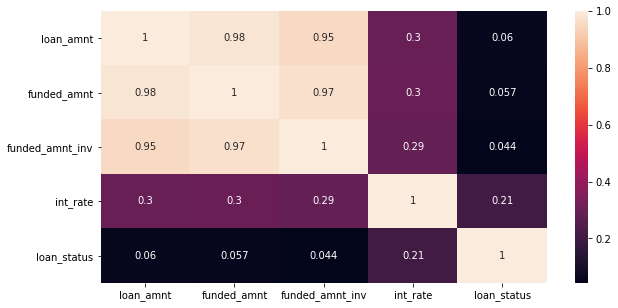

In [76]:
'''
Trying a correlation matrix with first set. 
'''

fig, ax = plt.subplots(figsize=(10,5))
corr = loan_first_set_corr.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            ax = ax,
            annot=True
           )

#### In above we see that we have a high correlation with Loan status and interest rate. A higher interest rate may hence lead to non payment of pending amount on time. Repeat Same exercise with rest of the sets. at least in above case we see that we have good correlation between the amount funded to a customer w.r.t the status of the loan. 

In [77]:
'''
second set with 'installment', 'grade', 'annual_inc', 'emp_length','home_ownership' columns
'''

loan_second_set_corr = loan_select_cols[['installment', 'grade', 'annual_inc', 'emp_length','home_ownership', 'loan_status']]

loan_second_set_corr.head()

,installment,grade,annual_inc,emp_length,home_ownership,loan_status
0,162.87,B,24000.0,10,RENT,Fully Paid
1,59.83,C,30000.0,0,RENT,Charged Off
2,84.33,C,12252.0,10,RENT,Fully Paid
3,339.31,C,49200.0,10,RENT,Fully Paid
5,156.46,A,36000.0,3,RENT,Fully Paid


In [78]:
### updating the required fields like grade, home ownership and loan status with numeric markings

# changing the grade column

print(loan_second_set_corr['grade'].unique())

loan_second_set_corr.grade = loan_second_set_corr.grade.str.replace('A','1')
loan_second_set_corr.grade = loan_second_set_corr.grade.str.replace('B','2')
loan_second_set_corr.grade = loan_second_set_corr.grade.str.replace('C','3')
loan_second_set_corr.grade = loan_second_set_corr.grade.str.replace('D','4')
loan_second_set_corr.grade = loan_second_set_corr.grade.str.replace('E','5')
loan_second_set_corr.grade = loan_second_set_corr.grade.str.replace('F','6')
loan_second_set_corr.grade = loan_second_set_corr.grade.str.replace('G','7')

print(loan_second_set_corr['grade'].unique())

# changing the HOME OWNERSHIP column

print(loan_second_set_corr['home_ownership'].unique())

loan_second_set_corr.home_ownership = loan_second_set_corr.home_ownership.str.replace('RENT','1')
loan_second_set_corr.home_ownership = loan_second_set_corr.home_ownership.str.replace('OWN','2')
loan_second_set_corr.home_ownership = loan_second_set_corr.home_ownership.str.replace('MORTGAGE','3')
loan_second_set_corr.home_ownership = loan_second_set_corr.home_ownership.str.replace('OTHER','4')

print(loan_second_set_corr['home_ownership'].unique())


# working with the target variables

print(loan_second_set_corr['loan_status'].unique())

loan_second_set_corr.loan_status = loan_second_set_corr.loan_status.str.replace('Fully Paid','0')

loan_second_set_corr.loan_status = loan_second_set_corr.loan_status.str.replace('Current','1')

loan_second_set_corr.loan_status = loan_second_set_corr.loan_status.str.replace('Charged Off','2')

loan_second_set_corr.loan_status = pd.to_numeric(loan_second_set_corr.loan_status, errors='coerce').fillna(0).astype(np.int64)

print(loan_second_set_corr['loan_status'].unique())

loan_second_set_corr.head()


['B' 'C' 'A' 'E' 'F' 'D' 'G']
['2' '3' '1' '5' '6' '4' '7']
['RENT' 'OWN' 'MORTGAGE' 'OTHER']
['1' '2' '3' '4']
['Fully Paid' 'Charged Off']
[0 2]


,installment,grade,annual_inc,emp_length,home_ownership,loan_status
0,162.87,2,24000.0,10,1,0
1,59.83,3,30000.0,0,1,2
2,84.33,3,12252.0,10,1,0
3,339.31,3,49200.0,10,1,0
5,156.46,1,36000.0,3,1,0


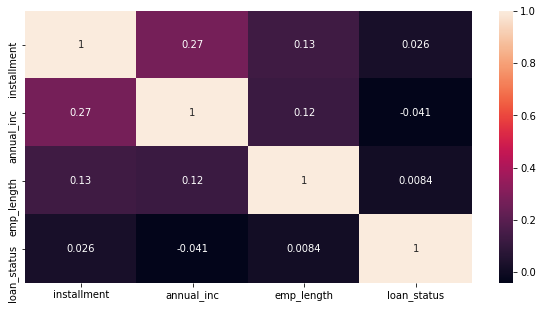

In [79]:
'''
Trying a correlation matrix with second set. 
'''

fig, ax = plt.subplots(figsize=(10,5))
corr = loan_second_set_corr.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            ax = ax,
            annot=True
           )

#### Clearly the annual income of a customer has a very negetive correlation with  loan status, but the installment amount has a good correlation. This states that customers who have lesser annual income may be probable candidates who'd not pay off their loans. Customers who have good take home salary would not mind (much) with the installment amount. 

In [80]:
'''
third set with 'verification_status', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'addr_state' columns
'''

loan_third_set_corr = loan_select_cols[['verification_status', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'addr_state', 'loan_status']]

loan_third_set_corr.head()

,verification_status,dti,delinq_2yrs,inq_last_6mths,addr_state,loan_status
0,Verified,27.65,0,1,AZ,Fully Paid
1,Source Verified,1.00,0,5,GA,Charged Off
2,Not Verified,8.72,0,2,IL,Fully Paid
3,Source Verified,20.00,0,1,CA,Fully Paid
5,Source Verified,11.20,0,3,AZ,Fully Paid


In [81]:
### updating the required fields like verification status and loan status with numeric markings

# changing the grade column

print(loan_third_set_corr['verification_status'].unique())

loan_third_set_corr.verification_status = loan_third_set_corr.verification_status.str.replace('Verified','1')
loan_third_set_corr.verification_status = loan_third_set_corr.verification_status.str.replace('Source 1','2')
loan_third_set_corr.verification_status = loan_third_set_corr.verification_status.str.replace('Not 1','3')

print(loan_third_set_corr['verification_status'].unique())

# working with the target variables

print(loan_third_set_corr['loan_status'].unique())

loan_third_set_corr.loan_status = loan_third_set_corr.loan_status.str.replace('Fully Paid','0')

loan_third_set_corr.loan_status = loan_third_set_corr.loan_status.str.replace('Current','1')

loan_third_set_corr.loan_status = loan_third_set_corr.loan_status.str.replace('Charged Off','2')

loan_third_set_corr.loan_status = pd.to_numeric(loan_third_set_corr.loan_status, errors='coerce').fillna(0).astype(np.int64)

print(loan_third_set_corr['loan_status'].unique())

loan_third_set_corr.head()


['Verified' 'Source Verified' 'Not Verified']
['1' '2' '3']
['Fully Paid' 'Charged Off']
[0 2]


,verification_status,dti,delinq_2yrs,inq_last_6mths,addr_state,loan_status
0,1,27.65,0,1,AZ,0
1,2,1.00,0,5,GA,2
2,3,8.72,0,2,IL,0
3,2,20.00,0,1,CA,0
5,2,11.20,0,3,AZ,0


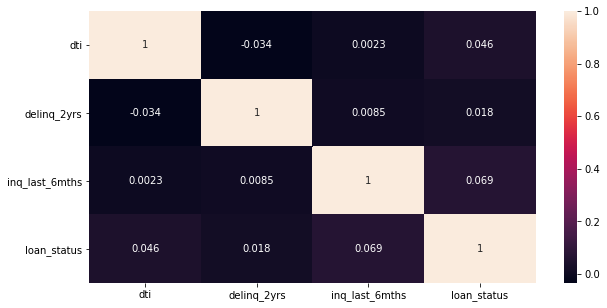

In [82]:
'''
Trying a correlation matrix with third set. 
'''

fig, ax = plt.subplots(figsize=(10,5))
corr = loan_third_set_corr.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            ax = ax,
            annot=True
           )

#### Similar to previous set of testing, we can see there is somewhat correlation seen with Status of loan payoff with DTI Ratio and number of inquiries in past 6 months (excluding auto and mortgage inquiries). Customers with such cases in high volume may be of high chances of non repayment of loans. 

In [83]:
'''
fourth set with 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc' columns
'''

loan_fourth_set_corr = loan_select_cols[['open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'loan_status']]

loan_fourth_set_corr.head()


,open_acc,pub_rec,revol_bal,revol_util,total_acc,loan_status
0,3,0,13648,83.70%,9,Fully Paid
1,3,0,1687,9.40%,4,Charged Off
2,2,0,2956,98.50%,10,Fully Paid
3,10,0,5598,21%,37,Fully Paid
5,9,0,7963,28.30%,12,Fully Paid


In [84]:
### updating the required fields like revol_util and loan status with numeric markings

# changing the grade column

print(loan_fourth_set_corr['revol_util'].unique())

loan_fourth_set_corr.revol_util = loan_fourth_set_corr.revol_util.str.replace('%','')

loan_fourth_set_corr.revol_util = pd.to_numeric(loan_fourth_set_corr.revol_util, errors='coerce').fillna(0).astype(np.int64)

print(loan_fourth_set_corr['revol_util'].unique())

# working with the target variables

print(loan_fourth_set_corr['loan_status'].unique())

loan_fourth_set_corr.loan_status = loan_fourth_set_corr.loan_status.str.replace('Fully Paid','0')

loan_fourth_set_corr.loan_status = loan_fourth_set_corr.loan_status.str.replace('Current','1')

loan_fourth_set_corr.loan_status = loan_fourth_set_corr.loan_status.str.replace('Charged Off','2')

loan_fourth_set_corr.loan_status = pd.to_numeric(loan_fourth_set_corr.loan_status, errors='coerce').fillna(0).astype(np.int64)

print(loan_fourth_set_corr['loan_status'].unique())

loan_fourth_set_corr.head()


['83.70%' '9.40%' '98.50%' ... '49.63%' '0.04%' '7.28%']
[83  9 98 21 28 85 87 32 36 20 67 91 43 55 81 70 16 37 23 90 82 29 93 59
 86 27 60 57 13 50 66 18 99 62 52 19 63 92 97 75 72 58 30 45 73 79 78 65
  6 77 53 74 96 88 51 46 47 48 49 54 56 76 34  0 71 33 35 31 40 61 80 69
 95 42 68  1 89 84 64 25 38 22 24 94  4 39 44  3 12  7  8 26 10 41 17  5
 15  2 11 14]
['Fully Paid' 'Charged Off']
[0 2]


,open_acc,pub_rec,revol_bal,revol_util,total_acc,loan_status
0,3,0,13648,83,9,0
1,3,0,1687,9,4,2
2,2,0,2956,98,10,0
3,10,0,5598,21,37,0
5,9,0,7963,28,12,0


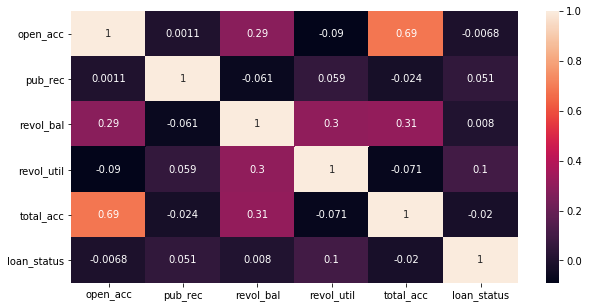

In [85]:
'''
Trying a correlation matrix with fourth set. 
'''

fig, ax = plt.subplots(figsize=(10,5))
corr = loan_fourth_set_corr.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            ax = ax,
            annot=True
           )

#### firstly, the loan status has good correlation with Number of derogatory public records. Customers with good score on this factor are less likely to default on the loan. 

In [86]:
'''
fifth set with 'total_rec_prncp', 'out_prncp', 'out_prncp_inv', 'total_pymnt','total_pymnt_inv' columns
'''

loan_fifth_set_corr = loan_select_cols[['total_rec_prncp', 'out_prncp', 'out_prncp_inv', 'total_pymnt','total_pymnt_inv', 'loan_status']]

loan_fifth_set_corr.head()


,total_rec_prncp,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,loan_status
0,5000.00,0.0,0.0,5863.155187,5833.84,Fully Paid
1,456.46,0.0,0.0,1008.710000,1008.71,Charged Off
2,2400.00,0.0,0.0,3005.666844,3005.67,Fully Paid
3,10000.00,0.0,0.0,12231.890000,12231.89,Fully Paid
5,5000.00,0.0,0.0,5632.210000,5632.21,Fully Paid


In [87]:
# working with the target variables

print(loan_fifth_set_corr['loan_status'].unique())

loan_fifth_set_corr.loan_status = loan_fifth_set_corr.loan_status.str.replace('Fully Paid','0')

loan_fifth_set_corr.loan_status = loan_fifth_set_corr.loan_status.str.replace('Current','1')

loan_fifth_set_corr.loan_status = loan_fifth_set_corr.loan_status.str.replace('Charged Off','2')

loan_fifth_set_corr.loan_status = pd.to_numeric(loan_fifth_set_corr.loan_status, errors='coerce').fillna(0).astype(np.int64)

print(loan_fifth_set_corr['loan_status'].unique())

loan_fifth_set_corr.head()

['Fully Paid' 'Charged Off']
[0 2]


,total_rec_prncp,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,loan_status
0,5000.00,0.0,0.0,5863.155187,5833.84,0
1,456.46,0.0,0.0,1008.710000,1008.71,2
2,2400.00,0.0,0.0,3005.666844,3005.67,0
3,10000.00,0.0,0.0,12231.890000,12231.89,0
5,5000.00,0.0,0.0,5632.210000,5632.21,0


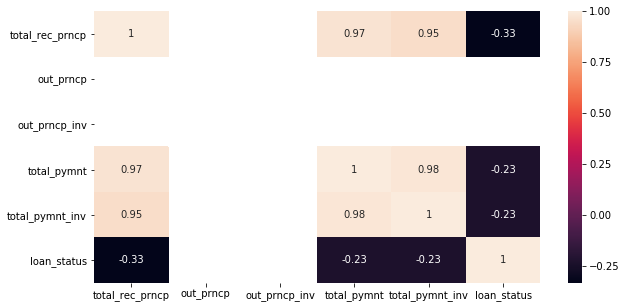

In [88]:
'''
Trying a correlation matrix with fifth set. 
'''

fig, ax = plt.subplots(figsize=(10,5))
corr = loan_fifth_set_corr.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            ax = ax,
            annot=True
           )

#### It is clear from above that the loan status is negetively correlated with Principal received to date whic makes sense as these are customers who are loyal and are paying off the loan on time. 

In [89]:
'''
sixth set with 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', columns
'''

loan_sixth_set_corr = loan_select_cols[['total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'loan_status']]

loan_sixth_set_corr.head()

,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,loan_status
0,863.16,0.00,0.00,0.00,Fully Paid
1,435.17,0.00,117.08,1.11,Charged Off
2,605.67,0.00,0.00,0.00,Fully Paid
3,2214.92,16.97,0.00,0.00,Fully Paid
5,632.21,0.00,0.00,0.00,Fully Paid


In [90]:
# working with the target variables

print(loan_sixth_set_corr['loan_status'].unique())

loan_sixth_set_corr.loan_status = loan_sixth_set_corr.loan_status.str.replace('Fully Paid','0')

loan_sixth_set_corr.loan_status = loan_sixth_set_corr.loan_status.str.replace('Current','1')

loan_sixth_set_corr.loan_status = loan_sixth_set_corr.loan_status.str.replace('Charged Off','2')

loan_sixth_set_corr.loan_status = pd.to_numeric(loan_sixth_set_corr.loan_status, errors='coerce').fillna(0).astype(np.int64)

print(loan_sixth_set_corr['loan_status'].unique())

loan_sixth_set_corr.head()

['Fully Paid' 'Charged Off']
[0 2]


,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,loan_status
0,863.16,0.00,0.00,0.00,0
1,435.17,0.00,117.08,1.11,2
2,605.67,0.00,0.00,0.00,0
3,2214.92,16.97,0.00,0.00,0
5,632.21,0.00,0.00,0.00,0


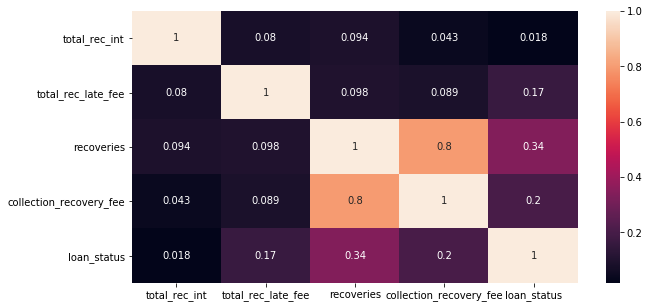

In [91]:
'''
Trying a correlation matrix with sixth set. 
'''

fig, ax = plt.subplots(figsize=(10,5))
corr = loan_sixth_set_corr.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            ax = ax,
            annot=True
           )

#### From Above, we see that post charge off gross recovery is correlated well with the final loan repayment status. Any fees associated with loan repayments are also somewhat correlated with the final loan status. This signifies that customers who're aware at the least of the recoveries and charges associated are susceptible to better loan repayments. 

In [92]:
'''
seventh set with 'last_pymnt_amnt', 'pub_rec_bankruptcies' columns
'''

loan_seventh_set_corr = loan_select_cols[['last_pymnt_amnt', 'pub_rec_bankruptcies', 'loan_status']]

loan_seventh_set_corr.head()


,last_pymnt_amnt,pub_rec_bankruptcies,loan_status
0,171.62,0.0,Fully Paid
1,119.66,0.0,Charged Off
2,649.91,0.0,Fully Paid
3,357.48,0.0,Fully Paid
5,161.03,0.0,Fully Paid


In [93]:
# working with the target variables

print(loan_seventh_set_corr['loan_status'].unique())

loan_seventh_set_corr.loan_status = loan_seventh_set_corr.loan_status.str.replace('Fully Paid','0')

loan_seventh_set_corr.loan_status = loan_seventh_set_corr.loan_status.str.replace('Current','1')

loan_seventh_set_corr.loan_status = loan_seventh_set_corr.loan_status.str.replace('Charged Off','2')

loan_seventh_set_corr.loan_status = pd.to_numeric(loan_seventh_set_corr.loan_status, errors='coerce').fillna(0).astype(np.int64)

print(loan_seventh_set_corr['loan_status'].unique())

loan_seventh_set_corr.head()

['Fully Paid' 'Charged Off']
[0 2]


,last_pymnt_amnt,pub_rec_bankruptcies,loan_status
0,171.62,0.0,0
1,119.66,0.0,2
2,649.91,0.0,0
3,357.48,0.0,0
5,161.03,0.0,0


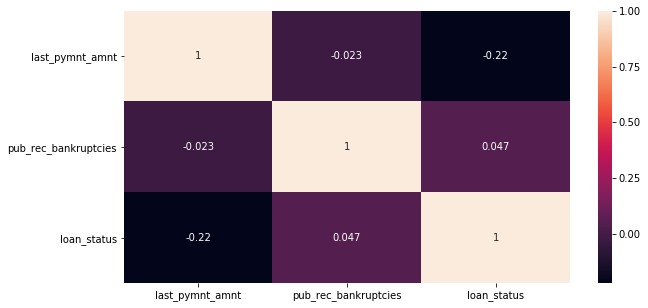

In [94]:
'''
Trying a correlation matrix with last set. 
'''

fig, ax = plt.subplots(figsize=(10,5))
corr = loan_seventh_set_corr.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            ax = ax,
            annot=True
           )

#### Finally we see that Number of public record bankruptcies are correlated to non repayment of loan. This should hence also be considered as a factor to identify defaulting customers. 

#### Finally we would visualize the trends based on loan status using the identified variables in above analysis which has most and least correlation with Loan Repayment Status. 

In [95]:
# make general plots to examine each feature
def plot_var(col_name, full_name, continuous):
    """
    Visualize a variable with/without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True for continuous variables
    """
    
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(35,7))
    
    # plot1: counts distribution of the variable
    if continuous:  
        sns.distplot(loan_select_cols.loc[loan_select_cols[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(loan_select_cols[col_name], 
                      order=sorted(loan_select_cols[col_name].unique()), 
                      color='#5975A4', 
                      saturation=1, ax=ax1)
    
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

          
    # plot2: bar plot of the variable grouped by loan_status
    if continuous:
        sns.boxplot(x=col_name, y='loan_status', data=loan_select_cols, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Loan Status')
    else:
        Charged_Off_rates = loan_select_cols.groupby(col_name)['loan_status'].value_counts(normalize=True)[:,'Charged Off']
        sns.barplot(x=Charged_Off_rates.index, y=Charged_Off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of Loans Charged Off')
        ax2.set_title('Charged Off Rate by ' + full_name)
        ax2.set_xlabel(full_name)
    
    # plot3: kde plot of the variable gropued by loan_status
    if continuous:  
        facet = sns.FacetGrid(loan_select_cols, hue = 'loan_status', size=3, aspect=4)
        facet.map(sns.kdeplot, col_name, shade=True)
        facet.add_legend()  
    else:
        fig = plt.figure(figsize=(35, 7))
        sns.countplot(x=col_name, hue='loan_status', data=loan_select_cols, order=sorted(loan_select_cols[col_name].unique()) )
     
    plt.tight_layout()

Based on our analysis previously we would look into the below variables and plot them one after the other. 

int_rate

installment

annual_inc

dti

inq_last_6mths

pub_rec

recoveries

pub_rec_bankruptcies

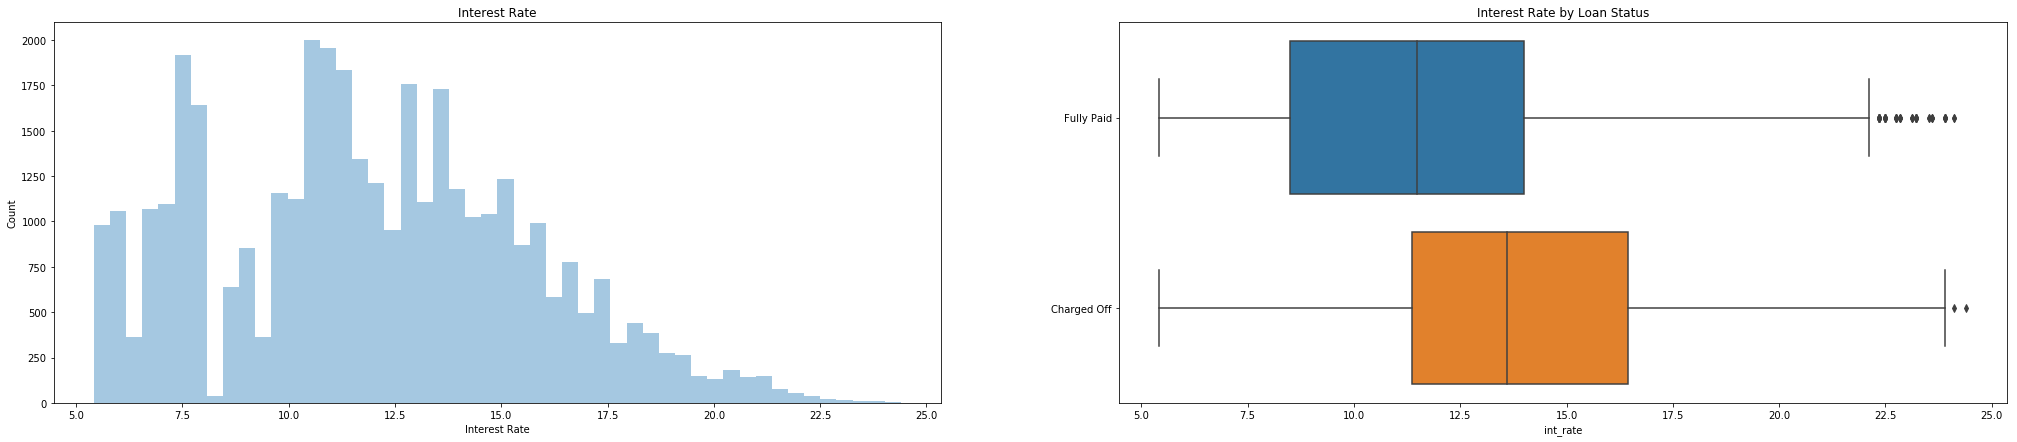

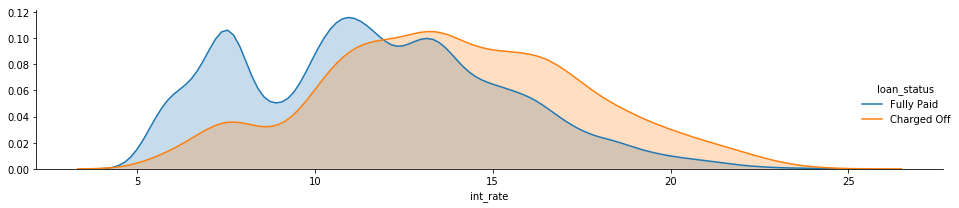

In [96]:
## Plotting based on Interest Rate

# remove the %-age sign from the int_rate column. 
loan_select_cols.int_rate = loan_select_cols.int_rate.str.replace('%','')

# first we have to convert interest rate into float variable. 
loan_select_cols.int_rate = loan_select_cols.int_rate.astype(float).fillna(0)

# now plot the data
plot_var('int_rate','Interest Rate',continuous=True)

### Clear from above that increased interest rate ensures better charge Off. 

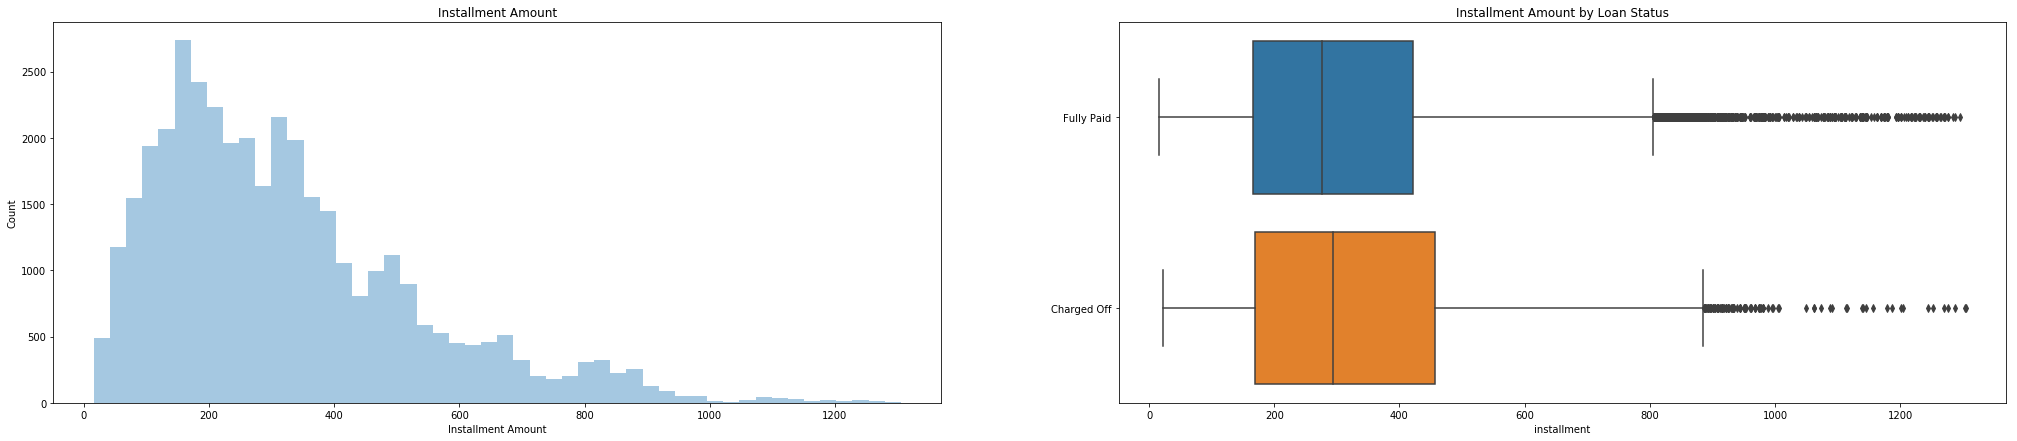

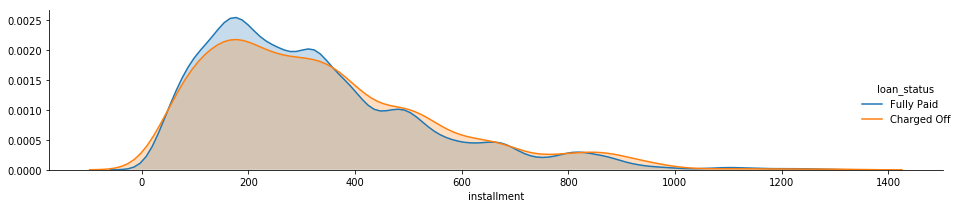

In [97]:
## Plotting based on installments

plot_var('installment','Installment Amount',continuous=True)

### Clear From above that Installment amount does not have much impact on the Charge Off.

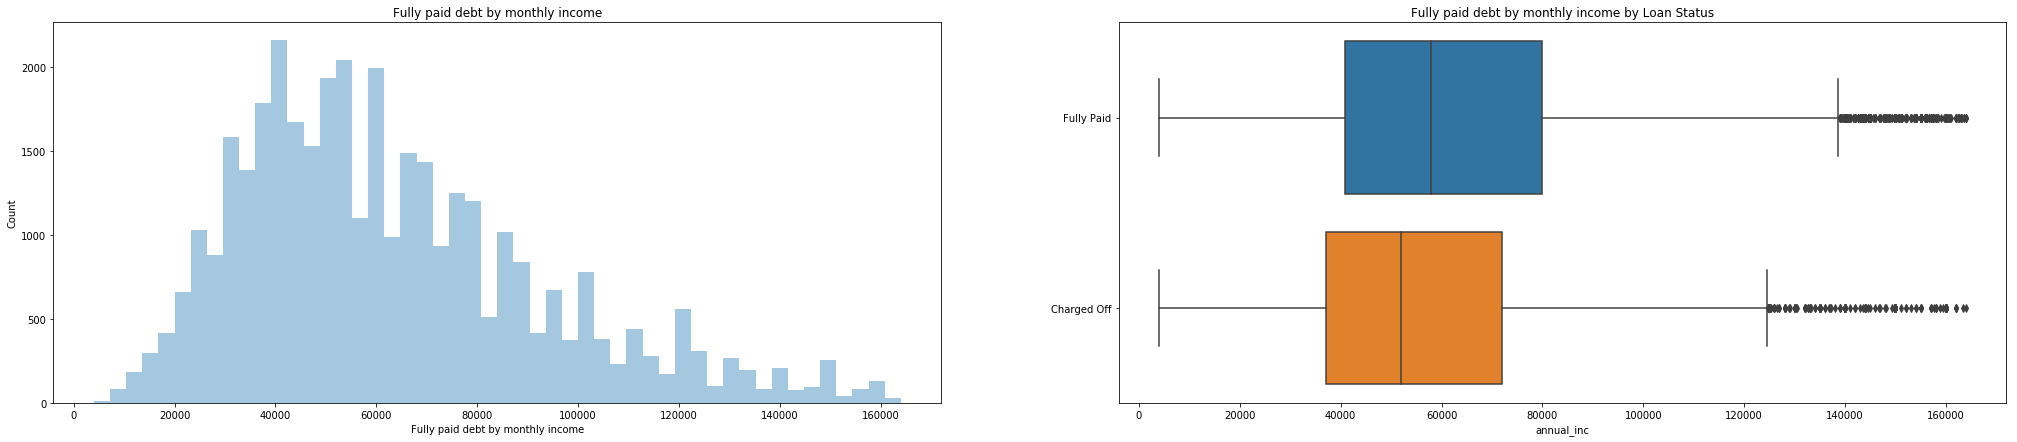

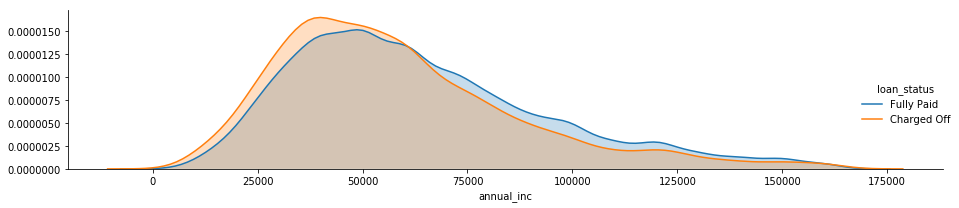

In [98]:
## Plotting based on Annual Income. 

# firstly let's see and fix outliers. 
loan_select_cols.annual_inc.describe()

# calculating and storing standard deviation and mean
# this would be later used for checing and removing outliers. 
std_annual_income = loan_select_cols.annual_inc.std()
mean_annual_income = loan_select_cols.annual_inc.mean()
positive_outlier = mean_annual_income + 1.5*std_annual_income

# removing outliers. 
loan_select_cols = loan_select_cols[loan_select_cols.annual_inc < positive_outlier]

# finally creating the plot. 
plot_var('annual_inc','Fully paid debt by monthly income',continuous=True)

### Customers with Lower Than Average Annual Income has better Charged Off. 

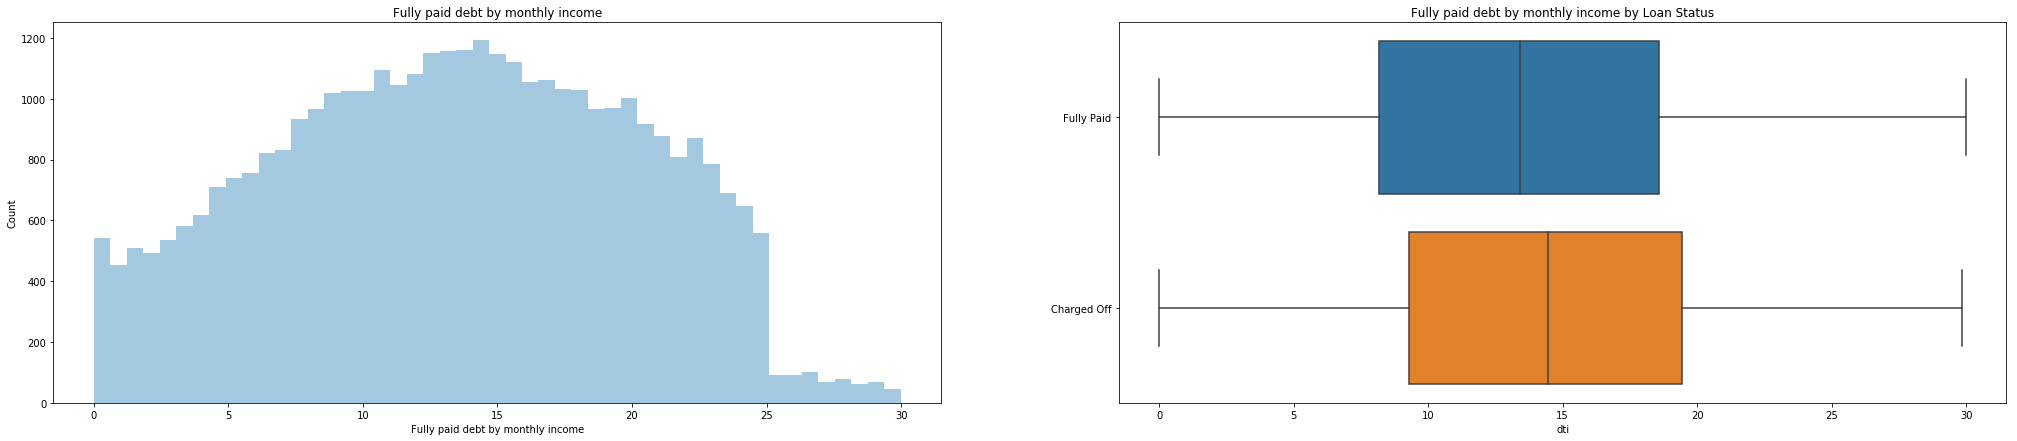

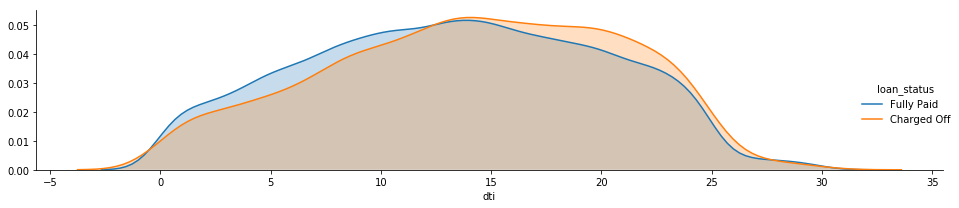

In [99]:
## Plot by DTI

plot_var('dti','Fully paid debt by monthly income',continuous=True)

### Customers with Better DTI has better Charge Off. 

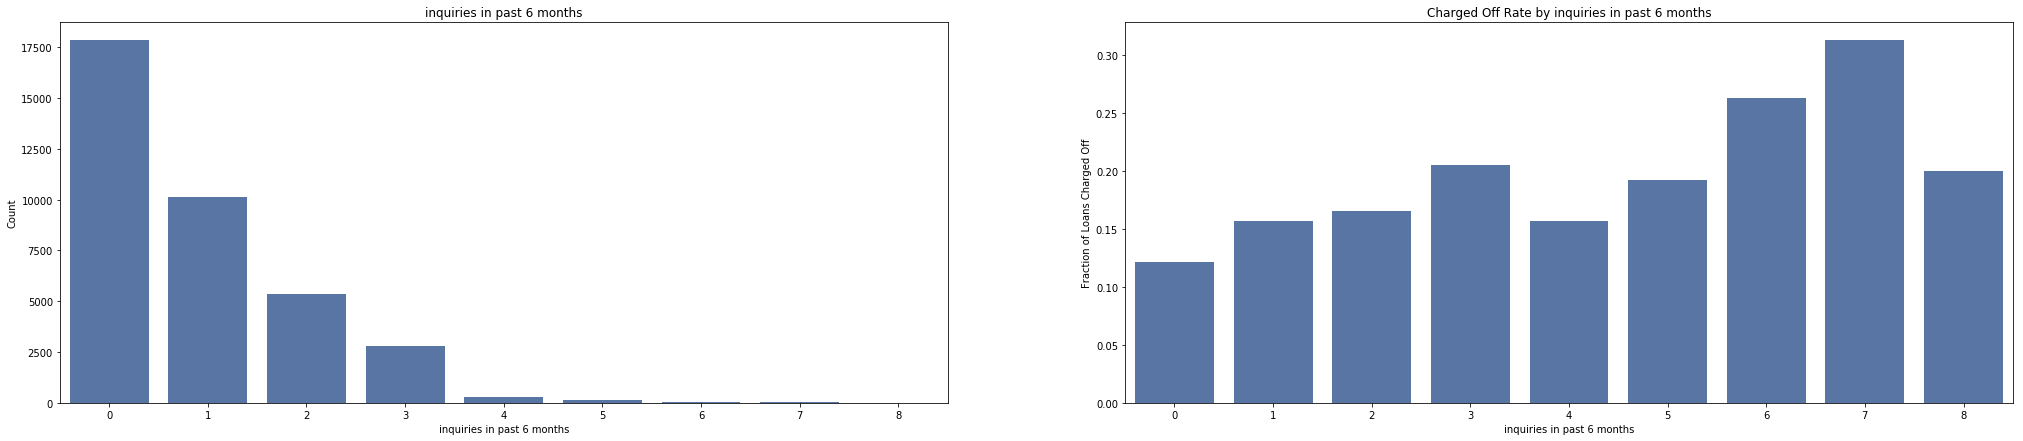

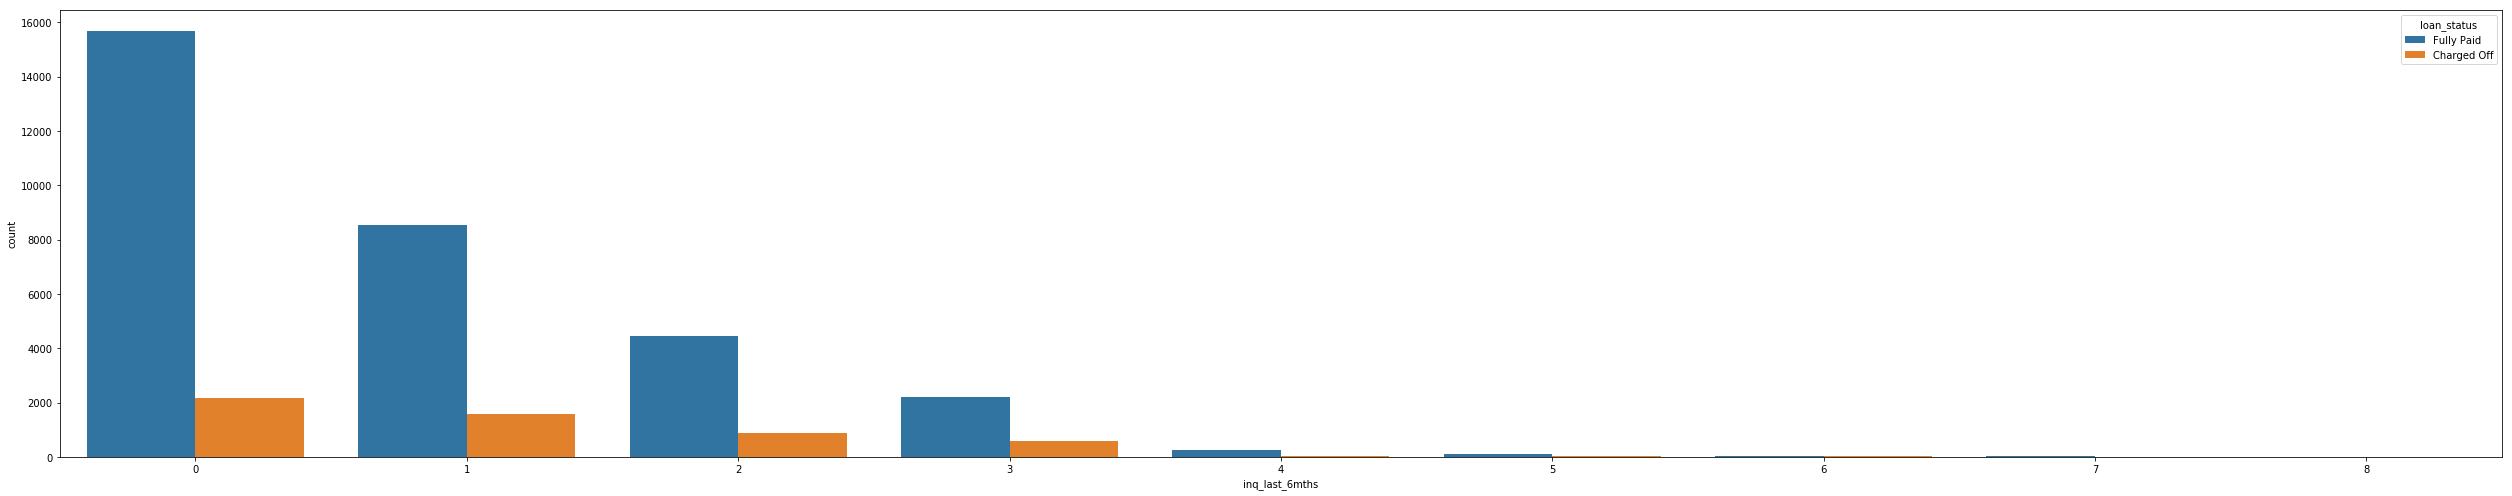

In [100]:
## Plot by inq_last_6mths

plot_var('inq_last_6mths','inquiries in past 6 months',continuous=False)

### Lesser Number of Inquiries in Last 6 months leads to better Charge Off.

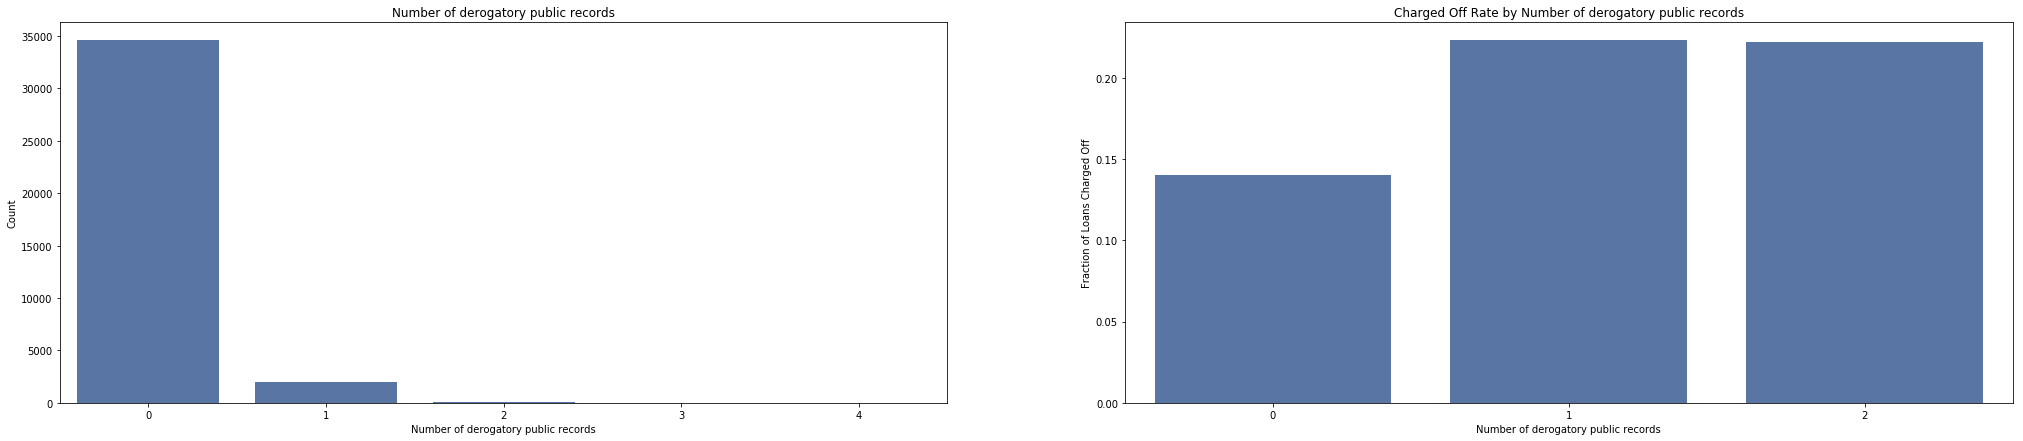

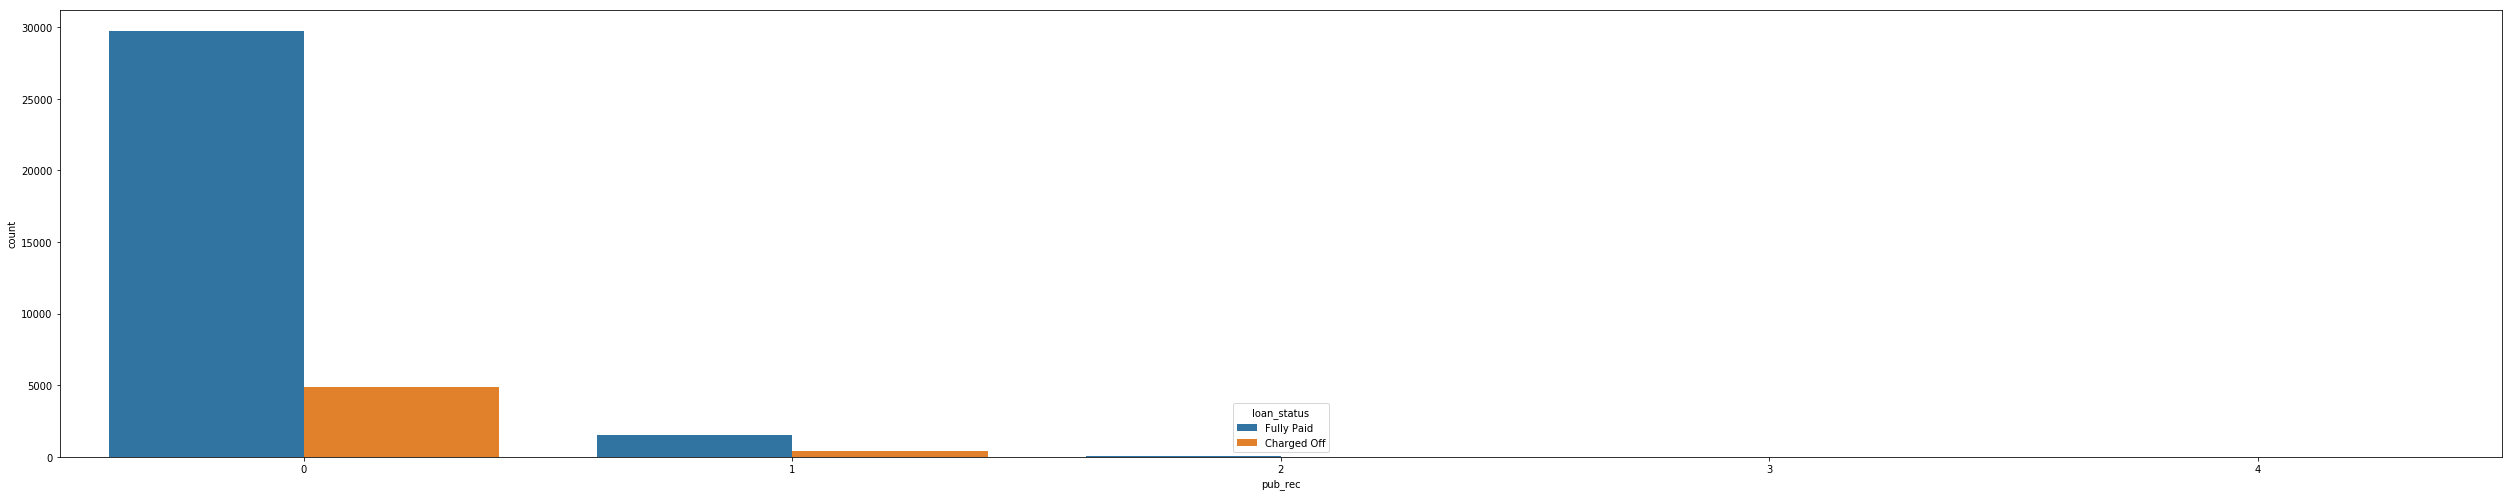

In [101]:
## Plot by pub_rec

plot_var('pub_rec','Number of derogatory public records',continuous=False)

### Lesser Number of derogatory public records relates to Better Charge Off.

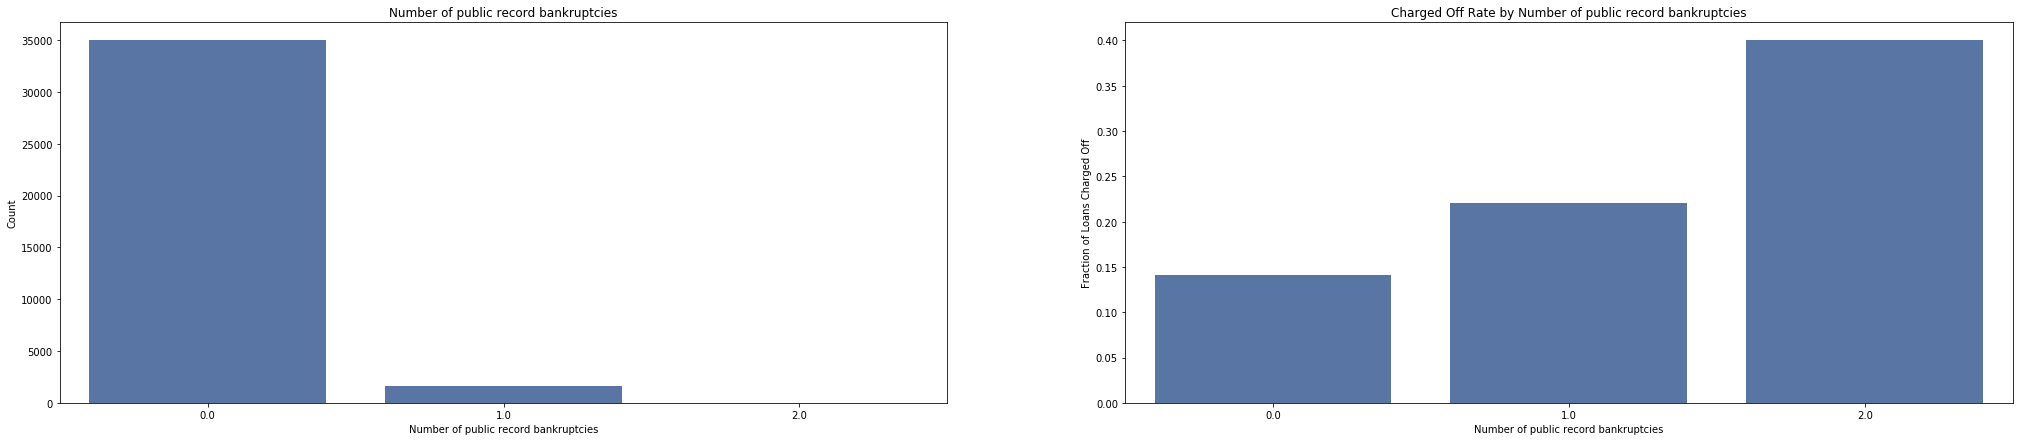

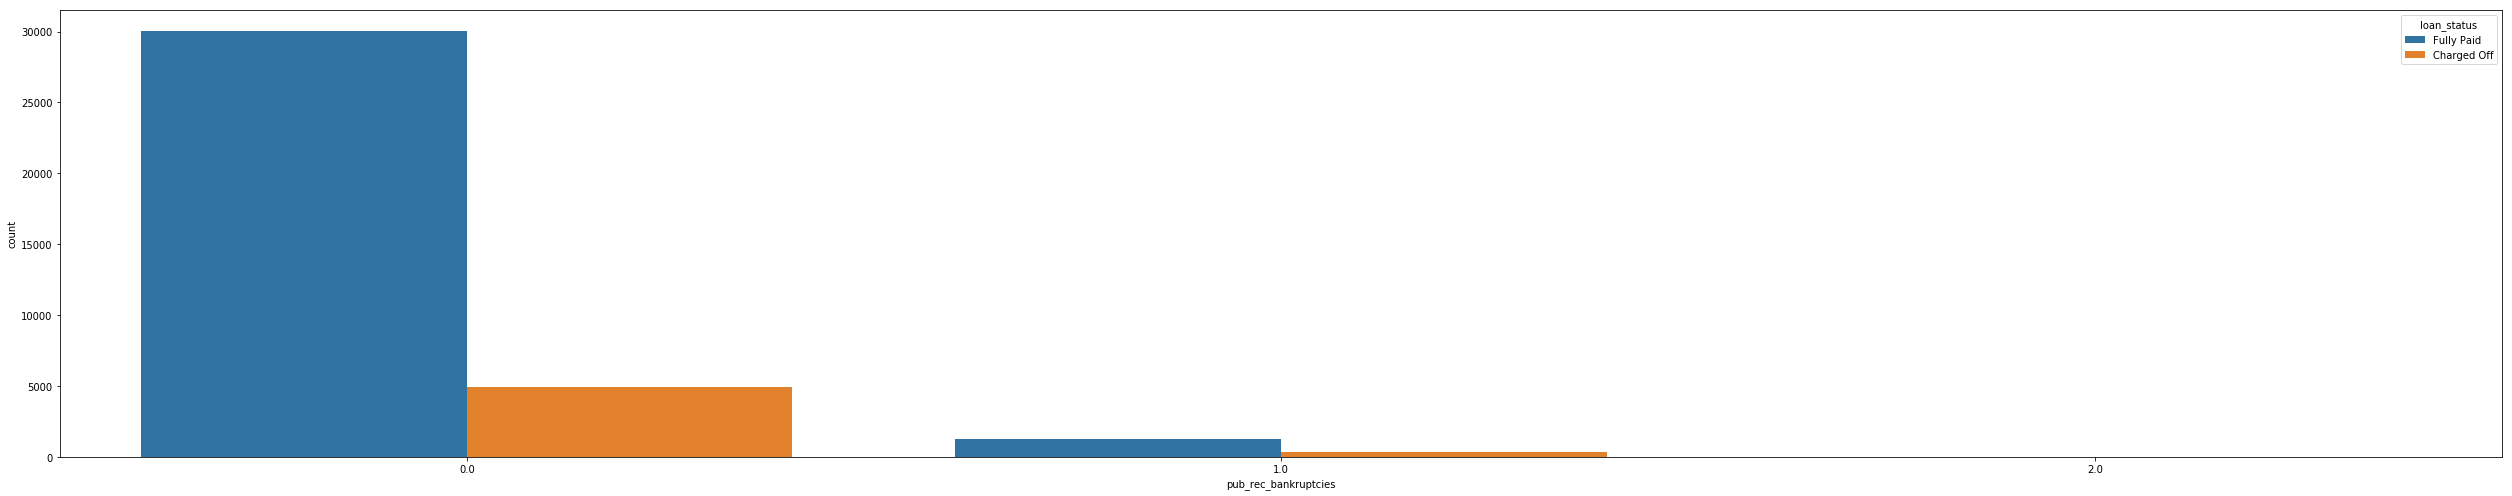

In [102]:
## Plot by pub_rec_bankruptcies

plot_var('pub_rec_bankruptcies','Number of public record bankruptcies',continuous=False)

### Lesser Number of public record bankruptcies correlates to Better Charge Offs.

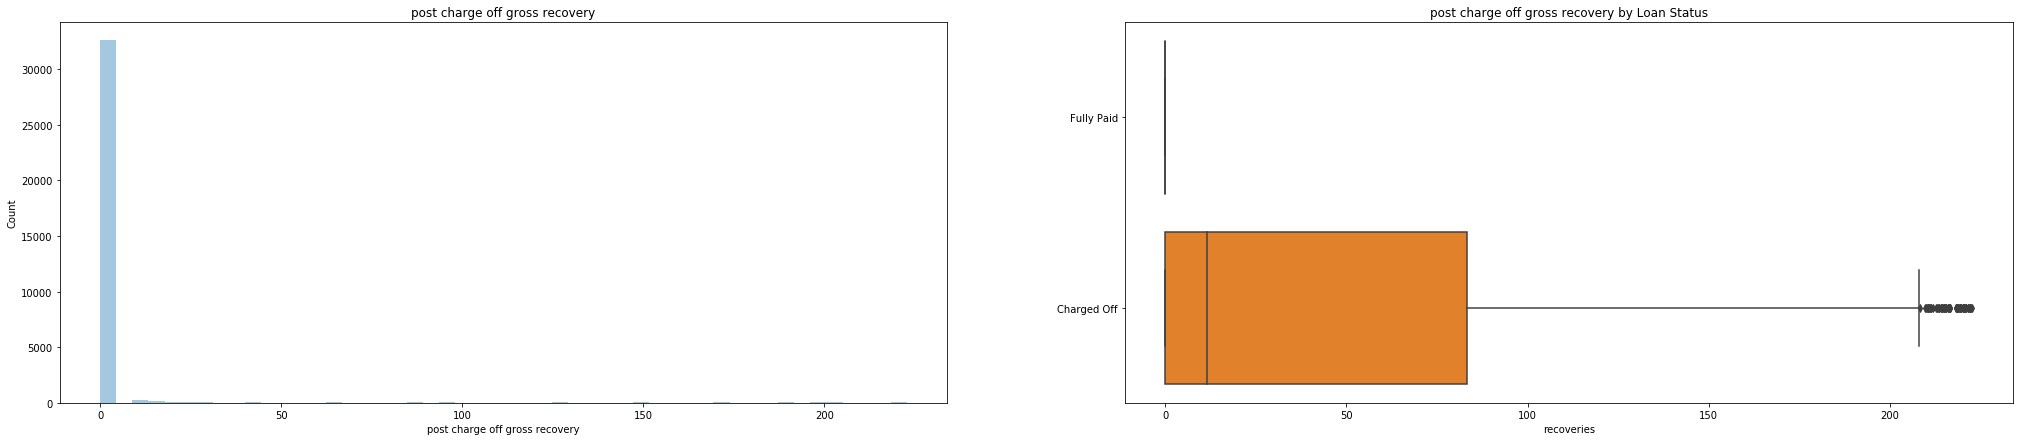

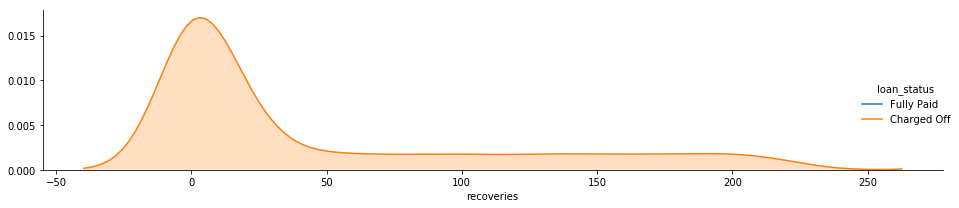

In [104]:
## Plot by recoveries column. 

# first, clean the dataset to get rid of outliers. 
# better to take a backup copy of original dataframe.  
loan_select_cols_bkp = loan_select_cols

# finding mean and std to further remove outliers. 
std_recoveries = loan_select_cols.recoveries.std()
mean_recoveries = loan_select_cols.recoveries.mean()
positive_outlier_recoveries = mean_recoveries + 1.5*std_recoveries

# filter out all outliers. 
loan_select_cols = loan_select_cols[loan_select_cols.recoveries < positive_outlier_recoveries]

# finally make the plot. 
plot_var('recoveries','post charge off gross recovery',continuous=True)

### Lesser post charge off gross recovery leads to Better Charge Off. 